In [1]:
import numpy as np
import utils
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rc('font', size=14)

In [2]:
frequency_multipliers = 2**np.arange(3,8)

## No spacing, large time step

In [3]:
downsample_errors = np.zeros(frequency_multipliers.shape)
downsample_matrix_size = np.zeros((frequency_multipliers.size,2))

for fm_idx,frequency_multiplier in enumerate(frequency_multipliers):
    print("Frequency multiplier %d" % frequency_multiplier)

    mu1=5
    mu2=5
    c1 = 0
    c2 = 0
    tau1=.2
    tau2=tau1*frequency_multiplier

    x0=[0.0,2.0,2.0,0.0]
    
    fast_period_length = 11.45015*tau1
    slow_period_length = fast_period_length*frequency_multiplier

    num_periods_simulate = 10
    sampling_rate_simulate = 2048
    t_simulate = np.linspace(0, num_periods_simulate*slow_period_length,
                    int(num_periods_simulate*sampling_rate_simulate*slow_period_length/fast_period_length))
    dt_simulate = t_simulate[1]-t_simulate[0]

    initial_samples = int(5*sampling_rate_simulate)
    vdp_simulation = utils.simulate_coupled_vdp(dt_simulate, t_simulate.size+initial_samples, x0=x0,
                                              mu1=mu1, mu2=mu2, c1=c1, c2=c2, tau1=tau1, tau2=tau2)[0]
    vdp_solution = vdp_simulation[:,initial_samples:]
    coupled_solution = vdp_solution[0:1] + vdp_solution[2:3]
    
    num_periods_subsample = 5
    sampling_rate_subsample = 256//frequency_multiplier

    t_max_idx = int(num_periods_subsample*slow_period_length/dt_simulate)+2
    spacing = sampling_rate_simulate//sampling_rate_subsample

    t_sample = t_simulate[:t_max_idx:spacing]
    dt_sample = t_sample[1] - t_sample[0]

    sampled_data = coupled_solution[:,:t_max_idx:spacing]

    time_delay=sampling_rate_subsample*frequency_multiplier
    time_delay_spacing=1
    rank=100
    
    sample_spacing=1
    dt_scaling=1

    dmd = utils.DMD(truncation='hard', threshold=rank, time_delay=time_delay, time_delay_spacing=time_delay_spacing)
    dmd.fit(sampled_data, dt_sample, sample_spacing=sample_spacing, dt_scale=dt_scaling)
    dmd_reconstruction = dmd.reconstruct(t_simulate, imaginary_evals=True)

    error = np.mean((coupled_solution[0] - dmd_reconstruction[0])**2)
    downsample_errors[fm_idx] = error
    downsample_matrix_size[fm_idx] = utils.hankel_matrix(sampled_data, time_delay,
                                                    spacing=time_delay_spacing)[:,dt_scaling::sample_spacing].shape

Frequency multiplier 8
Frequency multiplier 16
Frequency multiplier 32
Frequency multiplier 64
Frequency multiplier 128


## No spacing, small time step

In [5]:
nospacing_errors = np.zeros(frequency_multipliers.shape)
nospacing_matrix_size = np.zeros((frequency_multipliers.size,2))

for fm_idx,frequency_multiplier in enumerate(frequency_multipliers):
    print("Frequency multiplier %d" % frequency_multiplier)

    mu1=5
    mu2=5
    c1 = 0
    c2 = 0
    tau1=.2
    tau2=tau1*frequency_multiplier

    x0=[0.0,2.0,2.0,0.0]
    
    fast_period_length = 11.45015*tau1
    slow_period_length = fast_period_length*frequency_multiplier

    num_periods_simulate = 10
    sampling_rate_simulate = 2048
    t_simulate = np.linspace(0, num_periods_simulate*slow_period_length,
                    int(num_periods_simulate*sampling_rate_simulate*slow_period_length/fast_period_length))
    dt_simulate = t_simulate[1]-t_simulate[0]

    initial_samples = int(5*sampling_rate_simulate)
    vdp_simulation = utils.simulate_coupled_vdp(dt_simulate, t_simulate.size+initial_samples, x0=x0,
                                              mu1=mu1, mu2=mu2, c1=c1, c2=c2, tau1=tau1, tau2=tau2)[0]
    vdp_solution = vdp_simulation[:,initial_samples:]
    coupled_solution = vdp_solution[0:1] + vdp_solution[2:3]
    
    num_periods_subsample = 5
    sampling_rate_subsample = 64

    t_max_idx = int(num_periods_subsample*slow_period_length/dt_simulate)+2
    spacing = sampling_rate_simulate//sampling_rate_subsample

    t_sample = t_simulate[:t_max_idx:spacing]
    dt_sample = t_sample[1] - t_sample[0]

    sampled_data = coupled_solution[:,:t_max_idx:spacing]

    time_delay=sampling_rate_subsample*frequency_multiplier
    time_delay_spacing=1
    rank=100
    
    sample_spacing=1
    dt_scaling=1

    dmd = utils.DMD(truncation='hard', threshold=rank, time_delay=time_delay, time_delay_spacing=time_delay_spacing)
    dmd.fit(sampled_data, dt_sample, sample_spacing=sample_spacing, dt_scale=dt_scaling)
    dmd_reconstruction = dmd.reconstruct(t_simulate, imaginary_evals=True)

    error = np.mean((coupled_solution[0] - dmd_reconstruction[0])**2)
    nospacing_errors[fm_idx] = error
    nospacing_matrix_size[fm_idx] = utils.hankel_matrix(sampled_data, time_delay,
                                                    spacing=time_delay_spacing)[:,dt_scaling::sample_spacing].shape

Frequency multiplier 8
Frequency multiplier 16
Frequency multiplier 32
Frequency multiplier 64
Frequency multiplier 128


## Space out rows and columns

In [6]:
fullspacing_errors = np.zeros(frequency_multipliers.shape)
fullspacing_matrix_size = np.zeros((frequency_multipliers.size,2))

for fm_idx,frequency_multiplier in enumerate(frequency_multipliers):
    print("Frequency multiplier %d" % frequency_multiplier)

    mu1=5
    mu2=5
    c1 = 0
    c2 = 0
    tau1=.2
    tau2=tau1*frequency_multiplier

    x0=[0.0,2.0,2.0,0.0]
    
    fast_period_length = 11.45015*tau1
    slow_period_length = fast_period_length*frequency_multiplier

    num_periods_simulate = 10
    sampling_rate_simulate = 2048
    t_simulate = np.linspace(0, num_periods_simulate*slow_period_length,
                    int(num_periods_simulate*sampling_rate_simulate*slow_period_length/fast_period_length))
    dt_simulate = t_simulate[1]-t_simulate[0]

    initial_samples = int(5*sampling_rate_simulate)
    vdp_simulation = utils.simulate_coupled_vdp(dt_simulate, t_simulate.size+initial_samples, x0=x0,
                                              mu1=mu1, mu2=mu2, c1=c1, c2=c2, tau1=tau1, tau2=tau2)[0]
    vdp_solution = vdp_simulation[:,initial_samples:]
    coupled_solution = vdp_solution[0:1] + vdp_solution[2:3]
    
    num_periods_subsample = 5
    sampling_rate_subsample = 256

    t_max_idx = int(num_periods_subsample*slow_period_length/dt_simulate)+2
    spacing = sampling_rate_simulate//sampling_rate_subsample

    t_sample = t_simulate[:t_max_idx:spacing]
    dt_sample = t_sample[1] - t_sample[0]

    sampled_data = coupled_solution[:,:t_max_idx:spacing]

    time_delay=sampling_rate_subsample
    time_delay_spacing=frequency_multiplier
    rank=100
    
    sample_spacing=frequency_multiplier//frequency_multipliers[0]
    dt_scaling=4

    dmd = utils.DMD(truncation='hard', threshold=rank, time_delay=time_delay, time_delay_spacing=time_delay_spacing)
    dmd.fit(sampled_data, dt_sample, sample_spacing=sample_spacing, dt_scale=dt_scaling)
    dmd_reconstruction = dmd.reconstruct(t_simulate, imaginary_evals=True)

    error = np.mean((coupled_solution[0,t_max_idx:] - dmd_reconstruction[0,t_max_idx:])**2)
    fullspacing_errors[fm_idx] = error
    fullspacing_matrix_size[fm_idx] = utils.hankel_matrix(sampled_data, time_delay,
                                                    spacing=time_delay_spacing)[:,dt_scaling::sample_spacing].shape

Frequency multiplier 8
Frequency multiplier 16
Frequency multiplier 32
Frequency multiplier 64
Frequency multiplier 128


# Plot results

## Snapshot matrix size

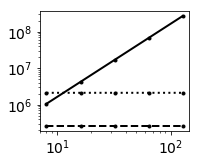

In [7]:
plt.figure(figsize=(3,2.5))
plt.loglog(frequency_multipliers, nospacing_matrix_size[:,0]*nospacing_matrix_size[:,1], '.-k', linewidth=2)
plt.loglog(frequency_multipliers, downsample_matrix_size[:,0]*downsample_matrix_size[:,1], '.--k', linewidth=2)
plt.loglog(frequency_multipliers, fullspacing_matrix_size[:,0]*fullspacing_matrix_size[:,1], '.:k', linewidth=2)
plt.tight_layout()
# plt.savefig('figures/05b_spacing_scaling.pdf', format='pdf', dpi=300)

## Error

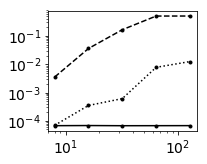

In [8]:
plt.figure(figsize=(3.1,2.5))
plt.loglog(frequency_multipliers, nospacing_errors, '.-k')
plt.loglog(frequency_multipliers, downsample_errors, '.--k')
plt.loglog(frequency_multipliers, fullspacing_errors, '.:k')
plt.tight_layout()
# plt.savefig('figures/05b_spacing_errors.pdf', format='pdf', dpi=300)